# Определение перспективного тарифа для телеком-компании

# 1. Введение <a class="anchor" id="1."></a>

# 1.1. Содержание <a class="anchor" id="1.1."></a>

* [1. Введение](#1.)
* [1.1. Содержание](#1.1.)
* [1.2. Описание проекта ](#1.2.)
* [1.3. Описние исходных данных](#1.3.)
* [1.4. Описние тарифов](#1.4.)
* [2. Подготовка данных](#2.)
* [2.1. Визуальное ознакомление](#2.1.)
* [2.2. Изменение типов](#2.2.)
* [2.3. Контроль примененных изменений после изменения типов](#2.3.)
* [2.4. Подготовка данных](#2.4.)
* [2.4.1. Количество сделанных звонков и израсходованных минут разговора по месяцам](#2.4.1.)
* [2.4.2. Количество отправленных сообщений по месяцам](#2.4.2.)
* [2.4.3. Объем израсходованного интернет-трафика по месяцам](#2.4.3.)
* [2.4.4. Помесячная выручка с каждого пользователя](#2.4.4.)
* [3. Анализ данных](#3.)
* [3.1. Сколько минут разговора требуется пользователям](#3.1.)
* [3.1.1. Тариф «Смарт»](#3.1.1.)
* [3.1.2. Тариф «Ультра»](#3.1.2.)
* [3.2. Сколько сообщений  требуется пользователям](#3.2.)
* [3.2.1. Тариф «Смарт»](#3.2.1.)
* [3.2.2. Тариф «Ультра»](#3.2.2.)
* [3.3. Какой объём интернет-трафика требуется пользователям](#3.3.)
* [3.3.1. Тариф «Смарт»](#3.3.1.)
* [3.3.2. Тариф «Ультра»](#3.3.2.)
* [4. Проверка гипотез](#4.)
* [4.1. Гипотеза о различии средней выручки пользователей тарифов «Ультра» и «Смарт»](#4.1.)
* [4.2. Гипотеза о различии средней выручки пользователей из Москвы и других регионов](#4.2.)
* [5. Общий вывод](#5.)

## 1.2. Описание проекта <a class="anchor" id="1.2."></a>

«Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# 1.3. Описние исходных данных <a class="anchor" id="1.3."></a>

Описание данных

Таблица **users** (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица **calls** (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица **messages** (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица **internet** (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица **tariffs** (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# 1.4. Описние тарифов <a class="anchor" id="1.4."></a> 

Тариф «**Смарт**»

1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 3 рубля
    - сообщение: 3 рубля
    - 1 Гб интернет-трафика: 200 рублей

Тариф «**Ультра**»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
    - минута разговора: 1 рубль
    - сообщение: 1 рубль
    - 1 Гб интернет-трафика: 150 рублей

**Примечание**:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

# 2. Подготовка данных <a class="anchor" id="2."></a> 
[наверх](#1.1.)

## 2.1. Визуальное ознакомление <a class="anchor" id="2.1."></a>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st

**Посмотрим на информацию о датасетах**

In [2]:
try:
    calls_df = pd.read_csv('/datasets/calls.csv')
    internet_df = pd.read_csv('/datasets/internet.csv', index_col=0)
    messages_df = pd.read_csv('/datasets/messages.csv')
    tariffs_df = pd.read_csv('/datasets/tariffs.csv')
    users_df = pd.read_csv('/datasets/users.csv')
except:
    calls_df = pd.read_csv('calls.csv')
    internet_df = pd.read_csv('internet.csv', index_col=0)
    messages_df = pd.read_csv('messages.csv')
    tariffs_df = pd.read_csv('tariffs.csv')
    users_df = pd.read_csv('users.csv')    

print('calls_df')
display(calls_df.head(2))
display(calls_df.info())

print('internet_df')
display(internet_df.head(2))
display(internet_df.info())

print('messages_df')
display(messages_df.head(2))
display(messages_df.info())

print('tariffs_df')
display(tariffs_df.head(2))
display(tariffs_df.info())

print('users_df')
display(users_df.head(2))
display(users_df.info())

calls_df


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

internet_df


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

messages_df


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

tariffs_df


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

users_df


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

Посмотрим, есть ли дубликаты

In [3]:
print('дубликатов в calls_df:', calls_df.duplicated().sum())
print('дубликатов в internet_df:', internet_df.duplicated().sum())
print('дубликатов в messages_df:', messages_df.duplicated().sum())
print('дубликатов в tariffs_df:', tariffs_df.duplicated().sum())
print('дубликатов в users_df:', users_df.duplicated().sum())

дубликатов в calls_df: 0
дубликатов в internet_df: 0
дубликатов в messages_df: 0
дубликатов в tariffs_df: 0
дубликатов в users_df: 0


Как видно из предварительного ознакомления с данными:
1. Дублей строк нет
2. Пропусков в данных нет, за исключением users_df.churn_date  где по понятным причинам, если не было оттока, то и даты нет. Других параметров, говорящих об оттоке нет. 
3. Есть некорректные типы
 - даты сохранены как object
 - id записей сохранены через знак '_'. В целях сокращения памяти уберем его и преобразуем в числовой тип
 
 **в связи с чем необходимо:**
 1. изменить типы данных в столбах с датами
 2. изменить id записей на числовой тип
 
 При изменении типов применим наиболее экономичные с точки зрезния занимаемого объема памяти типы.

# 2.2. Изменение типов <a class="anchor" id="2.2."></a>

In [4]:
# преобразование типов user_id
calls_df_ = calls_df.copy()
calls_df_['user_id'] = calls_df_['user_id'].astype(np.int16)
calls_df_['id'] = calls_df_['id'].apply(lambda x: x.replace('_', '')).astype(np.int32)
calls_df_['duration'] = calls_df_['duration'].astype(np.float64)
calls_df_['call_date'] = pd.to_datetime(calls_df_['call_date'], format ='%Y-%m-%d')

# преобразование типов internet_df
internet_df_ = internet_df.copy()
internet_df_['id'] = internet_df_['id'].apply(lambda x: x.replace('_', '')).astype(np.int32)
internet_df_['mb_used'] = internet_df_['mb_used'].astype(np.float32)
internet_df_['session_date'] = pd.to_datetime(internet_df_['session_date'],format ='%Y-%m-%d' )
internet_df_['user_id'] = internet_df_['user_id'].astype(np.int16)

# преобразование типов messages_df
messages_df_ = messages_df.copy()
messages_df_['id'] = messages_df_['id'].apply(lambda x: x.replace('_','')).astype(np.int32)
messages_df_['message_date'] = pd.to_datetime(messages_df_['message_date'], format = '%Y-%m-%d')
messages_df_['user_id'] = messages_df_['user_id'].astype(np.int16)

# преобразование типов  tariffs_df 
tariffs_df_ = tariffs_df.copy()
tariffs_df_['messages_included'] = tariffs_df_['messages_included'].astype(np.int16)
tariffs_df_['mb_per_month_included'] = tariffs_df_['mb_per_month_included'].astype(np.int16)
tariffs_df_['minutes_included'] = tariffs_df_['minutes_included'].astype(np.int16)
tariffs_df_['rub_monthly_fee'] = tariffs_df_['rub_monthly_fee'].astype(np.int16)
tariffs_df_['rub_per_gb'] = tariffs_df_['rub_per_gb'].astype(np.int16)
tariffs_df_['rub_per_message'] = tariffs_df_['rub_per_message'].astype(np.int8)
tariffs_df_['rub_per_minute'] = tariffs_df_['rub_per_minute'].astype(np.int8)

# преобразование типов  users_df 
users_df_ = users_df.copy()
users_df_['user_id'] = users_df_['user_id'].astype(np.int16)
users_df_['age'] = users_df_['age'].astype(np.int8)
users_df_['reg_date'] = pd.to_datetime(users_df_['reg_date'], format = '%Y-%m-%d')

# 2.3. Контроль примененных изменений после изменения типов <a class="anchor" id="2.3."></a>

В связи с тем что, были применены "экономичные" типы данных, возможно, что после проведенных замен типов изменились и сами значения. Необходимо это проверить.

In [5]:
def meanchecker(df1, df2):
    '''
    данная функция делает попытку преобразовать значения столбца в числовой формат и если это возможно сравнивает сумму двух датафреймов.
    При этом подавать на вход необходимо датафрейм до преобразования числовой формат и после.
    Таким образом будет осуществлена проверка корректности выбранного типа данных. За занижено ли значение типа. например выбрано int16, а надо было int32
    '''
    for col in df2.columns:
        try:
            if round(pd.to_numeric(df1[col]).mean(), 2) == round(df2[col].mean(),2):
                print(f'для {col}:   среднее совпадает')
            else: 
                print(f'для {col}:   среднее НЕ совпадает')
        except Exception as e:
            print(f'для {col}:     {e}')

In [6]:
meanchecker(calls_df, calls_df_)

для id:     Unable to parse string "1000_0" at position 0
для call_date:     Unable to parse string "2018-07-25" at position 0
для duration:   среднее совпадает
для user_id:   среднее совпадает


In [7]:
meanchecker(internet_df, internet_df_)

для id:     Unable to parse string "1000_0" at position 0
для mb_used:   среднее совпадает
для session_date:     Unable to parse string "2018-11-25" at position 0
для user_id:   среднее совпадает


In [8]:
meanchecker(messages_df, messages_df_)

для id:     Unable to parse string "1000_0" at position 0
для message_date:     Unable to parse string "2018-06-27" at position 0
для user_id:   среднее совпадает


In [9]:
meanchecker(tariffs_df, tariffs_df_)

для messages_included:   среднее совпадает
для mb_per_month_included:   среднее совпадает
для minutes_included:   среднее совпадает
для rub_monthly_fee:   среднее совпадает
для rub_per_gb:   среднее совпадает
для rub_per_message:   среднее совпадает
для rub_per_minute:   среднее совпадает
для tariff_name:     Unable to parse string "smart" at position 0


In [10]:
meanchecker(users_df, users_df_)

для user_id:   среднее совпадает
для age:   среднее совпадает
для churn_date:     Unable to parse string "2018-10-05" at position 19
для city:     Unable to parse string "Краснодар" at position 0
для first_name:     Unable to parse string "Рафаил" at position 0
для last_name:     Unable to parse string "Верещагин" at position 0
для reg_date:     Unable to parse string "2018-05-25" at position 0
для tariff:     Unable to parse string "ultra" at position 0


как видно, изменение типовы на числовые произошло корректно - среднее значение совпадает. Оставим пока датафреймы со скорректированными типами.

## 2.4. Подготовка данных  <a class="anchor" id="2.4."></a>

### 2.4.1. Количество сделанных звонков и израсходованных минут разговора по месяцам <a class="anchor" id="2.4.1."></a>

In [11]:
calls_df_['month'] = calls_df_['call_date'].dt.month
calls_df_['duration_rounded'] = calls_df_['duration'].apply(math.ceil) # округляем каждую неполную минуту в большую сторону

calls_count = calls_df_.pivot_table(index='user_id', columns ='month'  , values = 'duration', aggfunc = 'count')
calls_sum = calls_df_.pivot_table(index='user_id', columns ='month'  , values = 'duration_rounded', aggfunc = 'sum')

# выведем результаты 
display(calls_count.head())
display(calls_sum.head())

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
1002,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
1004,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0


month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
1004,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0


### 2.4.2. Количество отправленных сообщений по месяцам <a class="anchor" id="2.4.2."></a>

In [12]:
messages_df_['month'] = messages_df_['message_date'].dt.month
messages_count = calls_df_.pivot_table(index='user_id', columns ='month'  , values = 'id', aggfunc = 'count') 
messages_count.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
1002,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
1004,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0


### 2.4.3. Объем израсходованного интернет-трафика по месяцам <a class="anchor" id="2.4.3."></a>

In [13]:
def month_traffic_counter(x):
    '''
    данная функция предназначена для суммирования мегабайт трафика и пересчета в гигабайты с округлением в большую сторону
    '''
    return math.ceil(sum(x)/1024)
    
internet_df_['month'] = internet_df_['session_date'].dt.month
internet_sum = internet_df_.pivot_table(index='user_id', columns ='month', values = 'mb_used', aggfunc = month_traffic_counter)
internet_sum.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
user_id,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,14.0
1002,NaN,NaN,NaN,NaN,NaN,11.0,18.0,20.0,17.0,14.0,19.0,18.0
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,13.0,15.0,12.0,10.0
1004,NaN,NaN,NaN,NaN,14.0,18.0,22.0,28.0,15.0,19.0,16.0,18.0


### 2.4.4. Помесячная выручка с каждого пользователя <a class="anchor" id="2.4.4."></a>

In [14]:
# объединим полученные таблицы по user_id c тарифами
calls_sum = users_df_[['user_id', 'tariff']].join(calls_sum, on ='user_id' )
calls_count = users_df_[['user_id', 'tariff']].join(calls_count, on ='user_id' )
messages_count = users_df_[['user_id', 'tariff']].join(messages_count, on ='user_id' )
internet_sum = users_df_[['user_id', 'tariff']].join(internet_sum, on ='user_id' )
print('calls_sum')
display(calls_sum.head())
print('calls_count')
display(calls_count.head())
print('messages_count')
display(messages_count.head())
print('internet_sum')
display(internet_sum.head())

calls_sum


,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
2,1002,smart,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0
3,1003,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380.0,961.0,855.0,824.0,802.0
4,1004,ultra,NaN,NaN,NaN,NaN,35.0,171.0,135.0,137.0,117.0,145.0,117.0,130.0


calls_count


,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
2,1002,smart,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
3,1003,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
4,1004,ultra,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0


messages_count


,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,58.0,57.0,43.0,46.0
1,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,63.0
2,1002,smart,NaN,NaN,NaN,NaN,NaN,15.0,26.0,42.0,36.0,33.0,32.0,33.0
3,1003,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,134.0,108.0,115.0,108.0
4,1004,ultra,NaN,NaN,NaN,NaN,9.0,31.0,22.0,19.0,26.0,29.0,19.0,21.0


internet_sum


,user_id,tariff,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,ultra,NaN,NaN,NaN,NaN,3.0,23.0,14.0,14.0,15.0,15.0,15.0,10.0
1,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,14.0
2,1002,smart,NaN,NaN,NaN,NaN,NaN,11.0,18.0,20.0,17.0,14.0,19.0,18.0
3,1003,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,13.0,15.0,12.0,10.0
4,1004,ultra,NaN,NaN,NaN,NaN,14.0,18.0,22.0,28.0,15.0,19.0,16.0,18.0


In [15]:
# посчитаем помесячный дополнительный доход от звонков
def income_cals_counter(row, col, smart_threshold, ultra_threshold ):
    
    if row['tariff'] == 'smart':
        if row[col] <= smart_cals_threshold:
            return 0
        else:
            return (row[col] - smart_cals_threshold)*3
    if row['tariff'] == 'ultra':
        if row[col] <= ultra_cals_threshold:
            return 0
        else:
            return (row[col] - ultra_cals_threshold)*1 # явный рубль лучше неявного    

smart_cals_threshold = 500
ultra_cals_threshold = 3000

for col in range(1,13):
    newcol = str(col) + '_in' # от слова income - поступления
    calls_sum[newcol] = calls_sum.apply(income_cals_counter, args =(col,smart_cals_threshold,ultra_cals_threshold,), axis = 1)

In [16]:
# посчитаем помесячный дополнительный доход от сообщений
def income_message_counter(row, col, smart_message_threshold, ultra_message_threshold):
    
    if row['tariff'] == 'smart':
        if row[col] <= smart_message_threshold:
            return 0
        else:
            return (row[col] - smart_message_threshold)*3
    if row['tariff'] == 'ultra':
        if row[col] <= ultra_message_threshold:
            return 0
        else:
            return (row[col] - ultra_message_threshold)*1 # явный рубль лучше неявного    

smart_message_threshold = 50
ultra_message_threshold = 1000

for col in range(1,13):
    newcol = str(col) + '_in'
    messages_count[newcol] = messages_count.apply(income_message_counter,
                                                  args =(col,smart_message_threshold,ultra_message_threshold,),
                                                  axis = 1)

In [17]:
# посчитаем помесячный дополнительный доход от интернета
def income_internet_counter(row, col, smart_internet_threshold, ultra_internet_threshold):
    if row['tariff'] == 'smart':
        if row[col] <= smart_internet_threshold:
            return 0
        else:
            return (row[col] - smart_internet_threshold)*200
    if row['tariff'] == 'ultra':
        if row[col] <= ultra_internet_threshold:
            return 0
        else:
            return (row[col] - ultra_internet_threshold)*150   

smart_internet_threshold = 15
ultra_internet_threshold = 30       
for col in range(1,13):
    newcol = str(col) + '_in'
    internet_sum[newcol] = internet_sum.apply(income_internet_counter,
                                              args =(col, smart_internet_threshold, ultra_internet_threshold),
                                              axis = 1)

In [18]:
print('calls_sum')
display(calls_sum.head(2))
print('messages_count')
display(messages_count.head(2))
print('internet_sum')
display(internet_sum.head(2))

calls_sum


,user_id,tariff,1,2,3,4,5,6,7,8,...,3_in,4_in,5_in,6_in,7_in,8_in,9_in,10_in,11_in,12_in
0,1000,ultra,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


messages_count


,user_id,tariff,1,2,3,4,5,6,7,8,...,3_in,4_in,5_in,6_in,7_in,8_in,9_in,10_in,11_in,12_in
0,1000,ultra,NaN,NaN,NaN,NaN,22.0,43.0,47.0,52.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,39.0


internet_sum


,user_id,tariff,1,2,3,4,5,6,7,8,...,3_in,4_in,5_in,6_in,7_in,8_in,9_in,10_in,11_in,12_in
0,1000,ultra,NaN,NaN,NaN,NaN,3.0,23.0,14.0,14.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,0.0


In [19]:
'''
шаг.1
после применения к таблицам calls_sum, messages_count, internet_sum 
функций income_cals_counter, income_message_counter, income_internet_counter 
в данных таблицах появились столбцы, отображающие траты пользователя сверх тарифа. Они-то нас и интересуют. 
Создадим из них таблицы, отображающие только доход от превышения тарифа - удалим столбцы данными по единицам тарификации.
оставим только доход сверх тарифа и сохраним это в новые таблицы. 
сответсвенно это: calls_sum_income, messages_count_income, internet_sum_income
'''
collist_to_drop_1 = [i for i in range(1,13)]
calls_sum_income = calls_sum.drop(collist_to_drop_1, axis = 1)
messages_count_income = messages_count.drop(collist_to_drop_1, axis = 1)
internet_sum_income = internet_sum.drop(collist_to_drop_1, axis = 1)

'''
шаг.2
теперь с теми же таблицам calls_sum, messages_count, internet_sum 
провернем обратную операцию 
- вренем их к прежнему виду (т.е. до применения функций income_cals_counter, income_message_counter, income_internet_counter )
сответсвенно это будут: calls_sum_month_stat, messages_count_month_stat, internet_sum_month_stat
'''
collist_to_drop_2 = [str(i)+'_in' for i in range(1,13)]
calls_sum_month_stat = calls_sum.drop(collist_to_drop_2, axis = 1)
messages_count_month_stat = messages_count.drop(collist_to_drop_2, axis = 1)
internet_sum_month_stat = internet_sum.drop(collist_to_drop_2, axis = 1)

'''
шаг.3
в таблицах, полученным в шаге 1 назначим в качестве индекса столбец 'user_id'
'''
calls_sum_income.set_index('user_id', inplace=True)
messages_count_income.set_index('user_id', inplace=True)
internet_sum_income.set_index('user_id', inplace=True)

'''
шаг.4
сджойним таблицы, полученные в шаге 3'
'''
total_month_sum_income = calls_sum_income.\
join(messages_count_income, rsuffix = '_m' ).\
join(internet_sum_income, rsuffix = '_i' ).\
drop(columns = ['tariff_i', 'tariff_m'], axis =1)

In [20]:
# подготовим вспомогательный массив для перебора по нему столбцов при суммировании
col_for_sum = []
for i in range(1,13):
    sub_col = []
    for col in total_month_sum_income.columns:
        if str(i) in col.split('_'):
            sub_col.append(col)
    col_for_sum.append(sub_col)


# просуммируем помесячно все значения и удалим лишние столбцы. 
# т.е. получим таблицу, содеражащую доход от превышения трафика по каждой из услуг (звонки, сообщения, интернет)
for colset in col_for_sum:
    total_month_sum_income[colset[0]] = total_month_sum_income[colset[0]] + total_month_sum_income[colset[1]] + total_month_sum_income[colset[2]] # просуммируем помесячные доходы
    total_month_sum_income.drop(columns = [colset[1], colset[2]], inplace = True)
display(total_month_sum_income.head())

,tariff,1_in,2_in,3_in,4_in,5_in,6_in,7_in,8_in,9_in,10_in,11_in,12_in
user_id,,,,,,,,,,,,,
1000,ultra,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,smart,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,627.0,39.0
1002,smart,NaN,NaN,NaN,NaN,NaN,0.0,600.0,1000.0,400.0,0.0,800.0,600.0
1003,ultra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1004,ultra,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
#total_moth_sum.loc[total_sum['tariff']=='ultra'].head()

In [22]:
# подготовим функцию, которая приплюсует к дополнительным помесячным тратам абонентскую плату
def total_income_counter(row, col, tarif_smart, tarif_ultra):
    if row['tariff'] == 'smart':
        return row[col] + tarif_smart
    if row['tariff'] == 'ultra':
        return row[col] + tarif_ultra

tarif_smart = 550
tarif_ultra = 1950

# просуммируем доход от превышения трафика по каждой из услуг с стоимостью тарифного плана
total_moth_sum_final = pd.DataFrame()    
for col in range(1,13):
    oldcol = str(col) + '_in'# просто для удобства понимания - название столбца состит из месяца и суффикса "in" - income
    total_moth_sum_final[col] = total_month_sum_income.apply(total_income_counter,
                                                             args =(oldcol, tarif_smart, tarif_ultra),
                                                             axis = 1)

# и добавим к результирующей таблице столбец tariff  
total_moth_sum_final = total_moth_sum_final.join(total_month_sum_income['tariff'])
print('суммарный доход от превышения трафика по каждой из услуг и абонентской платы по каждому пользователю с указанием тарифа')
display(total_moth_sum_final.head())

суммарный доход от превышения трафика по каждой из услуг и абонентской платы по каждому пользователю с указанием тарифа


,1,2,3,4,5,6,7,8,9,10,11,12,tariff
user_id,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,ultra
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1177.0,589.0,smart
1002,NaN,NaN,NaN,NaN,NaN,550.0,1150.0,1550.0,950.0,550.0,1350.0,1150.0,smart
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,ultra
1004,NaN,NaN,NaN,NaN,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,1950.0,ultra


**Подытог:**

В настоящем разделе подготовлены следующие таблицы

|Название таблицы|Описание|
|--|--|
|total_moth_sum_final|Суммарный доход от превышения трафика по каждой из услуг и абонентской платы по каждому пользователю с указанием тарифа|
|calls_sum_month_stat|Суммарное количество звонков в месяц по каждому абоненту|
|messages_count_month_stat|Суммарное количество сообщений в месяц по каждому абоненту|
|internet_sum_month_stat|Суммарный объем интернет-трафика в месяц по каждому абоненту|


# 3. Анализ данных <a class="anchor" id="3."></a>
[наверх](#1.1.)

## 3.1. Сколько минут разговора требуется пользователям <a class="anchor" id="3.1."></a>

In [23]:
# просуммируем разговоры за все месяцы и сохраним в столбце 'sum'
calls_sum_month_stat['sum'] = calls_sum_month_stat[collist_to_drop_1].sum(axis=1)
# создадим новуютаблицу calls_sum_single и в ней оставим только сумму по всем месяцам
calls_sum_single = calls_sum_month_stat.drop(columns=collist_to_drop_1, axis=1)

## 3.1.1. Тариф «Смарт» <a class="anchor" id="3.1.1."></a>

Искомые метрики 

- среднее количество
- дисперсия
- стандартное отклонение

Построим гистограммы. Опишем распределения.

In [24]:
mean_calls_smart = calls_sum_single.loc[calls_sum_single['tariff']=='smart', 'sum'].mean()
print('Среднее значение продолжительности звонков за месяц для тарифа «Смарт» составляет:',mean_calls_smart)

variance_calls_smart = np.var(calls_sum_single.loc[calls_sum_single['tariff']=='smart', 'sum'])
print('Дисперсия (variance) продолжительности звонков за месяц для тарифа «Смарт» составляет:', variance_calls_smart)

std_calls_smart = np.std(calls_sum_single.loc[calls_sum_single['tariff']=='smart', 'sum'])
print('Стандартное отклонение (std) продолжительности звонков за месяц для тарифа «Смарт» составляет:', std_calls_smart)

Среднее значение продолжительности звонков за месяц для тарифа «Смарт» составляет: 2654.065527065527
Дисперсия (variance) продолжительности звонков за месяц для тарифа «Смарт» составляет: 3056755.0583842685
Стандартное отклонение (std) продолжительности звонков за месяц для тарифа «Смарт» составляет: 1748.3578176060726


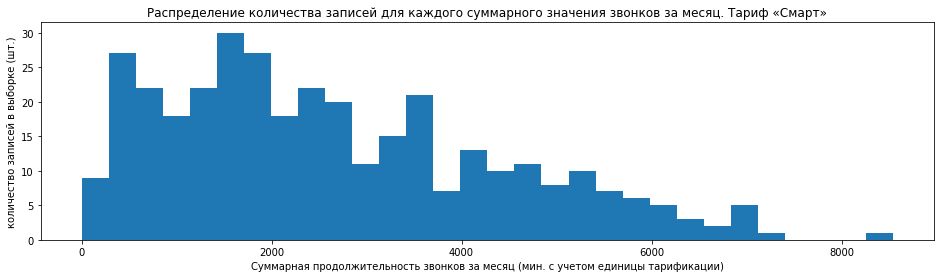

In [25]:
plt.figure(figsize=(16,4))
ax = calls_sum_single.loc[calls_sum_single['tariff']=='smart', 'sum'].plot(kind='hist', bins = 30)
ax.set(xlabel='Суммарная продолжительность звонков за месяц (мин. с учетом единицы тарификации)', ylabel='количество записей в выборке (шт.)')
ax.set_title("Распределение количества записей для каждого суммарного значения звонков за месяц. Тариф «Смарт»")
plt.show()

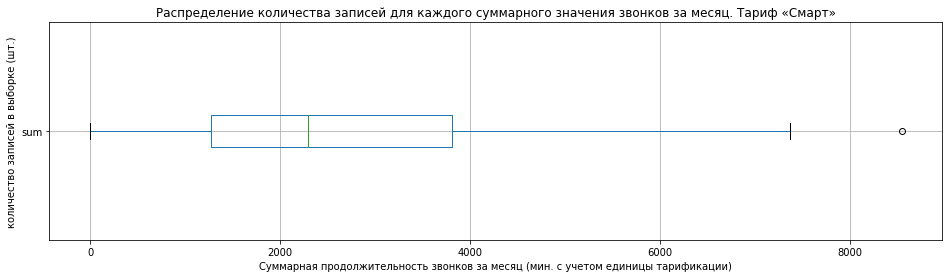

In [26]:
plt.figure(figsize=(16,4))
ax = calls_sum_single.loc[calls_sum_single['tariff']=='smart'].boxplot(column = 'sum', vert = False)
ax.set(xlabel='Суммарная продолжительность звонков за месяц (мин. с учетом единицы тарификации)', ylabel='количество записей в выборке (шт.)')
ax.set_title("Распределение количества записей для каждого суммарного значения звонков за месяц. Тариф «Смарт»")
plt.show()

Распределение тяготеет к нормальному но со скошенностью вправо. Присутствует пик в районе 400 (звонков), при этом медиана в районе 2250

## 3.1.2. Тариф «Ультра» <a class="anchor" id="3.1.2."></a> 

In [27]:
mean_calls_ultra = calls_sum_single.loc[calls_sum_single['tariff']=='ultra', 'sum'].mean()
print('Среднее значение продолжительности звонков за месяц для тарифа «Ультра» составляет:',mean_calls_ultra)

variance_calls_ultra = np.var(calls_sum_single.loc[calls_sum_single['tariff']=='ultra', 'sum'])
print('Дисперсия (variance) продолжительности звонков за месяц для тарифа «Ультра» составляет:', variance_calls_ultra)

std_calls_ultra = np.std(calls_sum_single.loc[calls_sum_single['tariff']=='ultra', 'sum'])
print('Стандартное отклонение (std) продолжительности звонков за месяц для тарифа «Ультра» составляет:', std_calls_ultra)

Среднее значение продолжительности звонков за месяц для тарифа «Ультра» составляет: 3481.3691275167785
Дисперсия (variance) продолжительности звонков за месяц для тарифа «Ультра» составляет: 7185793.977838836
Стандартное отклонение (std) продолжительности звонков за месяц для тарифа «Ультра» составляет: 2680.6331300345514


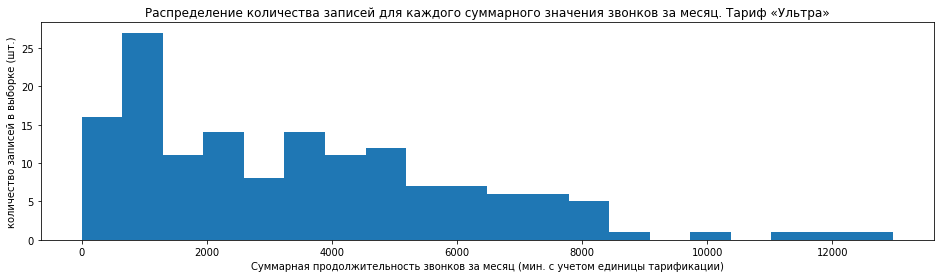

In [28]:
plt.figure(figsize=(16,4))
ax = calls_sum_single.loc[calls_sum_single['tariff']=='ultra', 'sum'].plot(kind='hist', bins = 20)
ax.set(xlabel='Суммарная продолжительность звонков за месяц (мин. с учетом единицы тарификации)', ylabel='количество записей в выборке (шт.)')
ax.set_title("Распределение количества записей для каждого суммарного значения звонков за месяц. Тариф «Ультра»")
plt.show()

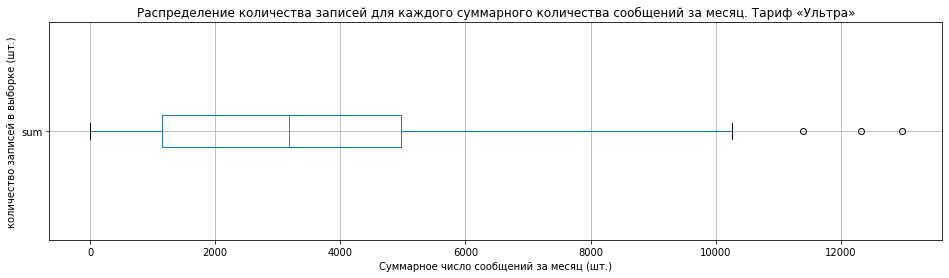

In [29]:
plt.figure(figsize=(16,4))
ax = calls_sum_single.loc[calls_sum_single['tariff']=='ultra'].boxplot(column = 'sum', vert = False)
ax.set(xlabel='Суммарное число сообщений за месяц (шт.)', ylabel='количество записей в выборке (шт.)')
ax.set_title("Распределение количества записей для каждого суммарного количества сообщений за месяц. Тариф «Ультра»")
plt.show()

Распределение тяготеет к нормальному со скошенностью вправо, но присутствует пик в районе 900 (звонков), при этом медиана в раоне 3175

## 3.2. Сколько сообщений  требуется пользователям <a class="anchor" id="3.2."></a> 

In [30]:
# просуммируем сообщения за все месяцы и сохраним в столбце 'sum'
messages_count_month_stat['sum'] = messages_count_month_stat[collist_to_drop_1].sum(axis=1)
# создадим новую таблицу messages_sum_single и в ней оставим только сумму по всем месяцам
messages_sum_single = messages_count_month_stat.drop(columns=collist_to_drop_1, axis=1)

## 3.2.1. Тариф «Смарт» <a class="anchor" id="3.2.1."></a> 

In [31]:
print('Среднее количество сообщений за месяц для тарифа «Смарт» составляет:',
      messages_sum_single.loc[messages_sum_single['tariff']=='smart', 'sum'].mean())

print('Дисперсия (variance) количество сообщений за месяц для тарифа «Смарт» составляет:',
      np.var(messages_sum_single.loc[messages_sum_single['tariff']=='smart', 'sum']))

print('Стандартное отклонение (std) количество сообщений за месяц для тарифа «Смарт» составляет:',
      np.std(messages_sum_single.loc[messages_sum_single['tariff']=='smart', 'sum']))

Среднее количество сообщений за месяц для тарифа «Смарт» составляет: 371.2678062678063
Дисперсия (variance) количество сообщений за месяц для тарифа «Смарт» составляет: 59793.666171540826
Стандартное отклонение (std) количество сообщений за месяц для тарифа «Смарт» составляет: 244.52743439446795


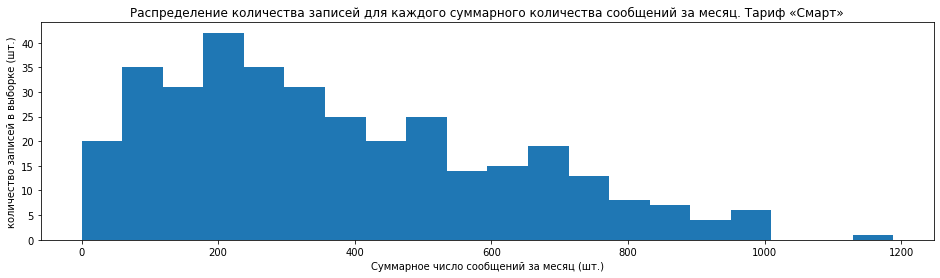

In [32]:
plt.figure(figsize=(16,4))
ax = messages_sum_single.loc[messages_sum_single['tariff']=='smart', 'sum'].plot(kind='hist', bins = 20)
ax.set(xlabel='Суммарное число сообщений за месяц (шт.)', ylabel='количество записей в выборке (шт.)')
ax.set_title("Распределение количества записей для каждого суммарного количества сообщений за месяц. Тариф «Смарт»")
plt.show()

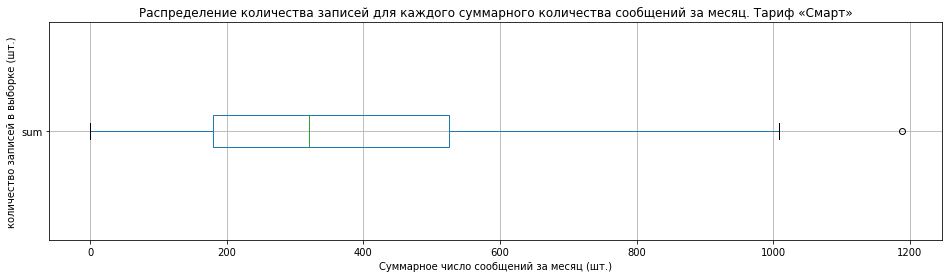

In [33]:
plt.figure(figsize=(16,4))
ax = messages_sum_single.loc[messages_sum_single['tariff']=='smart'].boxplot(column = 'sum', vert = False)
ax.set(xlabel='Суммарное число сообщений за месяц (шт.)', ylabel='количество записей в выборке (шт.)')
ax.set_title("Распределение количества записей для каждого суммарного количества сообщений за месяц. Тариф «Смарт»")
plt.show()

Распределение тяготеет к нормальному со скошенностью вправо, но присутствует пик в районе 200 (сообщений), при этом медиана в районе 320

## 3.2.2. Тариф «Ультра» <a class="anchor" id="3.2.2."></a>

In [34]:
print('Среднее количество сообщений за месяц для тарифа «Ультра» составляет:',
      messages_sum_single.loc[messages_sum_single['tariff']=='ultra', 'sum'].mean())

print('Дисперсия (variance) количество сообщений за месяц для тарифа «Ультра» составляет:',
      np.var(messages_sum_single.loc[messages_sum_single['tariff']=='ultra', 'sum']))

print('Стандартное отклонение (std) количество сообщений за месяц для тарифа «Ультра» составляет:',
      np.std(messages_sum_single.loc[messages_sum_single['tariff']=='ultra', 'sum']))

Среднее количество сообщений за месяц для тарифа «Ультра» составляет: 485.18120805369125
Дисперсия (variance) количество сообщений за месяц для тарифа «Ультра» составляет: 139586.17521733255
Стандартное отклонение (std) количество сообщений за месяц для тарифа «Ультра» составляет: 373.61233279608496


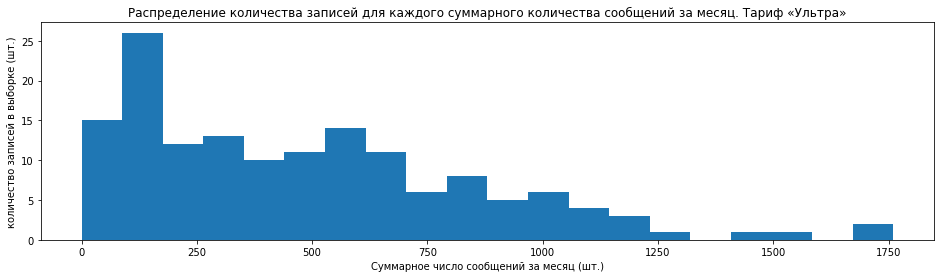

In [35]:
plt.figure(figsize=(16,4))
ax = messages_sum_single.loc[messages_sum_single['tariff']=='ultra', 'sum'].plot(kind='hist', bins = 20)
ax.set(xlabel='Суммарное число сообщений за месяц (шт.)', ylabel='количество записей в выборке (шт.)')
ax.set_title("Распределение количества записей для каждого суммарного количества сообщений за месяц. Тариф «Ультра»")
plt.show()

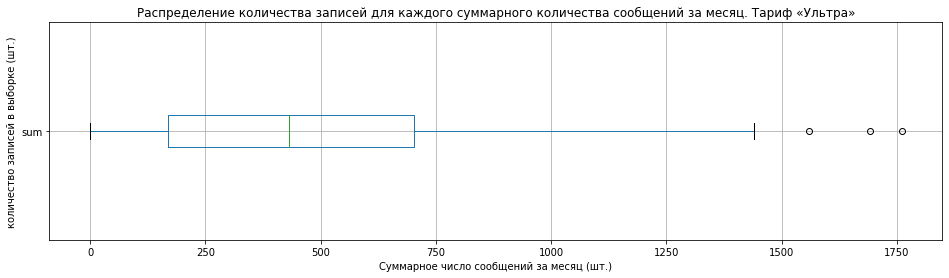

In [36]:
plt.figure(figsize=(16,4))
ax = messages_sum_single.loc[messages_sum_single['tariff']=='ultra'].boxplot(column = 'sum', vert = False)
ax.set(xlabel='Суммарное число сообщений за месяц (шт.)', ylabel='количество записей в выборке (шт.)')
ax.set_title("Распределение количества записей для каждого суммарного количества сообщений за месяц. Тариф «Ультра»")
plt.show()

Распределение тяготеет к нормальному со скошенностью вправо, но присутствует пик в районе 90 (сообщений), при этом медиана в районе 430

## 3.3. Какой объём интернет-трафика требуется пользователям <a class="anchor" id="3.3."></a>

In [37]:
# просуммируем интернет трафик за все месяцы и сохраним в столбце 'sum'
internet_sum_month_stat['sum'] = internet_sum_month_stat[collist_to_drop_1].sum(axis=1)
# создадим новую таблицу internet_sum_single и в ней оставим только сумму по всем месяцам
internet_sum_single = internet_sum_month_stat.drop(columns=collist_to_drop_1, axis=1)

## 3.3.1. Тариф «Смарт» <a class="anchor" id="3.3.1."></a> 

In [38]:
print('Средний объем трафика за месяц для тарифа «Смарт» составляет:',
      internet_sum_single.loc[internet_sum_single['tariff']=='smart', 'sum'].mean())

print('Дисперсия (variance) объема трафика за месяц для тарифа «Смарт» составляет:',
      np.var(internet_sum_single.loc[internet_sum_single['tariff']=='smart', 'sum']))

print('Стандартное отклонение (std) объема трафика за месяц для тарифа «Смарт» составляет:',
      np.std(internet_sum_single.loc[internet_sum_single['tariff']=='smart', 'sum']))

Средний объем трафика за месяц для тарифа «Смарт» составляет: 103.69515991210938
Дисперсия (variance) объема трафика за месяц для тарифа «Смарт» составляет: 3646.4404296875
Стандартное отклонение (std) объема трафика за месяц для тарифа «Смарт» составляет: 60.385765075683594


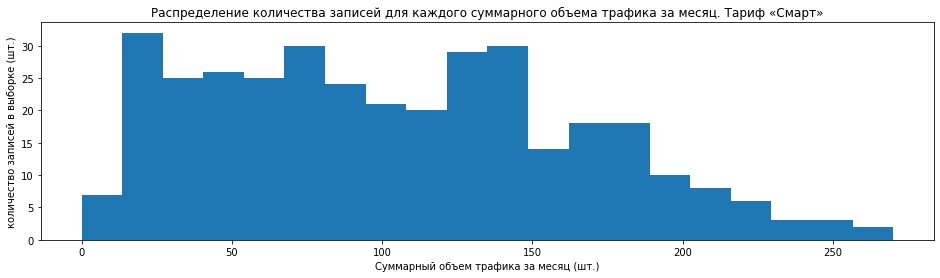

In [39]:
plt.figure(figsize=(16,4))
ax = internet_sum_single.loc[internet_sum_single['tariff']=='smart', 'sum'].plot(kind='hist', bins = 20)
ax.set(xlabel='Суммарный объем трафика за месяц (шт.)', ylabel='количество записей в выборке (шт.)')
ax.set_title("Распределение количества записей для каждого суммарного объема трафика за месяц. Тариф «Смарт»")
plt.show()

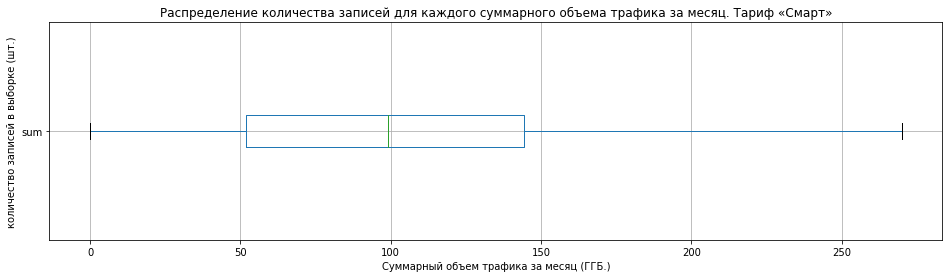

In [40]:
plt.figure(figsize=(16,4))
ax = internet_sum_single.loc[internet_sum_single['tariff']=='smart'].boxplot(column = 'sum', vert = False)
ax.set(xlabel='Суммарный объем трафика за месяц (ГГБ.)', ylabel='количество записей в выборке (шт.)')
ax.set_title("Распределение количества записей для каждого суммарного объема трафика за месяц. Тариф «Смарт»")
plt.show()

Распределение тяготеет к нормальному со скошенностью вправо, но присутствует пик в районе 20 (ггб), при этом медиана в районе 100

## 3.3.2. Тариф «Ультра» <a class="anchor" id="3.3.2."></a>

In [41]:
print('Средний объем трафика за месяц для тарифа «Ультра» составляет:',
      internet_sum_single.loc[internet_sum_single['tariff']=='ultra', 'sum'].mean())

print('Дисперсия (variance) объема трафика за месяц для тарифа «Ультра» составляет:',
      np.var(internet_sum_single.loc[internet_sum_single['tariff']=='ultra', 'sum']))

print('Стандартное отклонение (std) объема трафика за месяц для тарифа «Ультра» составляет:',
      np.std(internet_sum_single.loc[internet_sum_single['tariff']=='ultra', 'sum']))

Средний объем трафика за месяц для тарифа «Ультра» составляет: 128.8724822998047
Дисперсия (variance) объема трафика за месяц для тарифа «Ультра» составляет: 7542.48583984375
Стандартное отклонение (std) объема трафика за месяц для тарифа «Ультра» составляет: 86.84748840332031


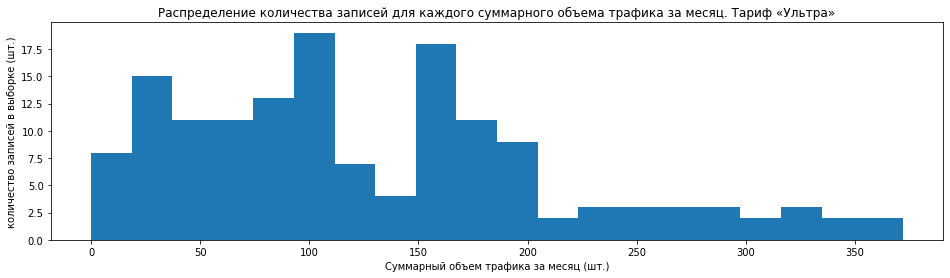

In [42]:
plt.figure(figsize=(16,4))
ax = internet_sum_single.loc[internet_sum_single['tariff']=='ultra', 'sum'].plot(kind='hist', bins = 20)
ax.set(xlabel='Суммарный объем трафика за месяц (шт.)', ylabel='количество записей в выборке (шт.)')
ax.set_title("Распределение количества записей для каждого суммарного объема трафика за месяц. Тариф «Ультра»")
plt.show()

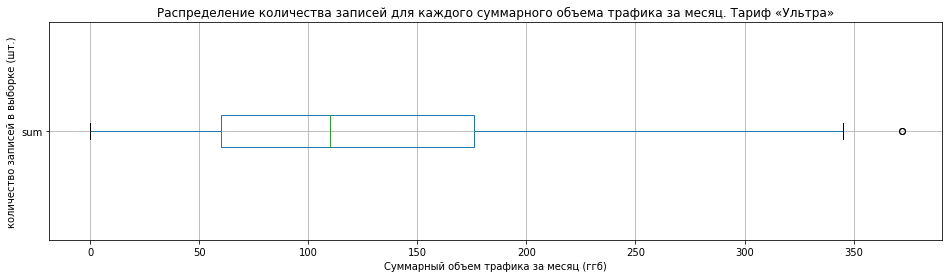

In [43]:
plt.figure(figsize=(16,4))
ax = internet_sum_single.loc[internet_sum_single['tariff']=='ultra'].boxplot(column = 'sum', vert = False)
ax.set(xlabel='Суммарный объем трафика за месяц (ггб)', ylabel='количество записей в выборке (шт.)')
ax.set_title("Распределение количества записей для каждого суммарного объема трафика за месяц. Тариф «Ультра»")
plt.show()

Распределение тяготеет к нормальному со скошенностью вправо, но присутствует пик в районе 160 (ггб), при этом медиана в районе 110

## Выводы: по п.3.  
По каждой из услуг (звонки, сообщения, интернет) наблюдается ситуация:
1. Среднее значение для тарифа «Ультра» больше чем для тарифа «Смарт»
2. Стандартное отклонение для тарифа «Ультра» больше чем для тарифа «Смарт» (примерно в 1,5 раза)
3. Наблюдается скошенность распрпделения вправо.

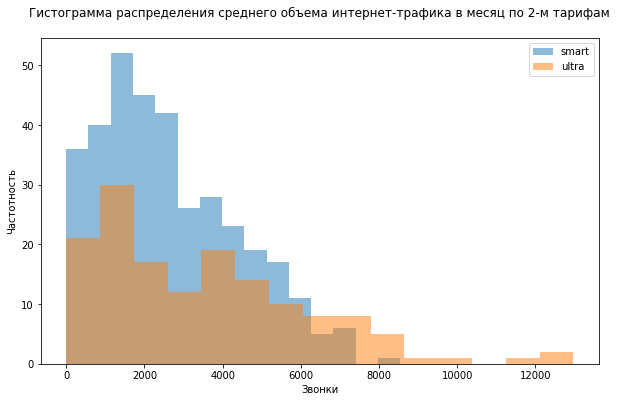

In [44]:
plt.figure(figsize=(10, 6))
calls_sum_single['sum'][calls_sum_single['tariff'] == 'smart'].plot(kind='hist', alpha=0.5, bins=15)
calls_sum_single['sum'][calls_sum_single['tariff'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=15)
plt.title('Гистограмма распределения среднего объема интернет-трафика в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Звонки')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra']) 

plt.show()   

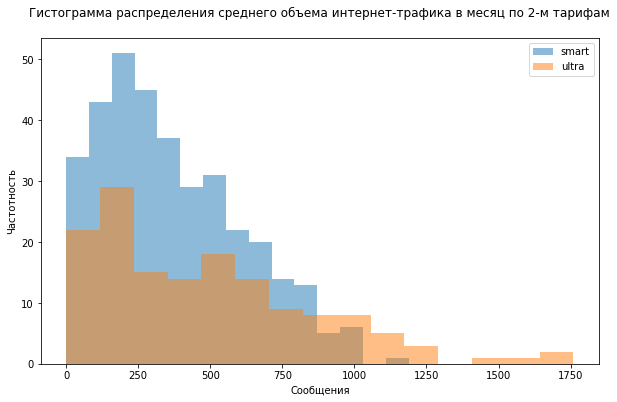

In [45]:
plt.figure(figsize=(10, 6))
messages_sum_single['sum'][messages_sum_single['tariff'] == 'smart'].plot(kind='hist', alpha=0.5, bins=15)
messages_sum_single['sum'][messages_sum_single['tariff'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=15)
plt.title('Гистограмма распределения среднего объема интернет-трафика в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Сообщения')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra']) 

plt.show()   

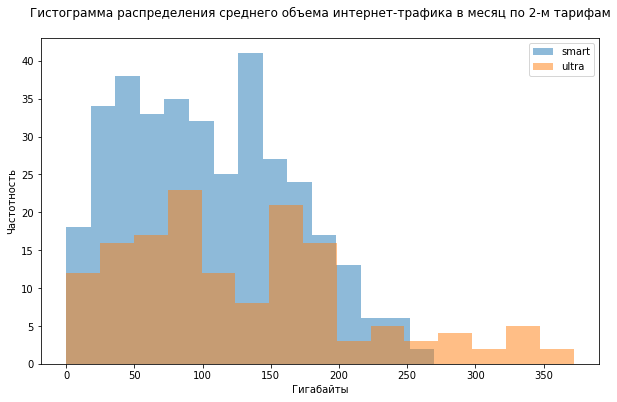

In [46]:
plt.figure(figsize=(10, 6))
internet_sum_single['sum'][internet_sum_single['tariff'] == 'smart'].plot(kind='hist', alpha=0.5, bins=15)
internet_sum_single['sum'][internet_sum_single['tariff'] == 'ultra'].plot(kind='hist', alpha=0.5, bins=15)
plt.title('Гистограмма распределения среднего объема интернет-трафика в месяц по 2-м тарифам'+ "\n")
plt.xlabel('Гигабайты')
plt.ylabel('Частотность')
plt.legend(['smart', 'ultra']) 

plt.show()    

# 4. Проверка гипотез <a class="anchor" id="4."></a>
[наверх](#1.1.)

## 4.1. Гипотеза о различии средней выручки пользователей тарифов «Ультра» и «Смарт» <a class="anchor" id="4.1."></a>

**Общая формулировка**: среднее значение выручки от пользователей тарифа «Ультра» и «Смарт» различаются

- Н0: нет никакх различий в среднем значении выручки по каждому из тарифов 
- Н1: средняя выручка по тарифу «Ультра» отличается от средней выручки по тарифу «Смарт»

In [47]:
# просуммируем по каждому пользователю доход по всем месяцам
total_moth_sum_final['sum'] = total_moth_sum_final[collist_to_drop_1].sum(axis=1)
# удалим столбцы с месяцами и оставим только столбцец с суммой за год
total_sum_final = total_moth_sum_final.drop(columns=collist_to_drop_1, axis=1)
# сделаем срезы по каждому из тарифов
sum_of_ultra = total_sum_final.loc[total_sum_final['tariff']=='ultra', 'sum']
sum_of_smart = total_sum_final.loc[total_sum_final['tariff']=='smart', 'sum']

In [48]:
results = st.ttest_ind(sum_of_ultra, sum_of_smart, equal_var = False )
alpha = 0.05 # возьмем "стандартное" значение. посмотрим какой будет рузультат
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средние выручки для двух тарифов статистически значимо отличаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средние выручки для двух тарифов статистически значимо не отличаются ")

p-значение: 2.6203166452102662e-11
Отвергаем нулевую гипотезу. Средние выручки для двух тарифов статистически значимо отличаются


In [49]:
print(f'средний годовой доход от клиентов на тарифе ultra составляет: {sum_of_ultra.mean()}')
print(f'средний годовой доход от клиентов на тарифе smart составляет: {sum_of_smart.mean()}')
print(f'суммарные годовые поступления от клиентов на тарифе ultra составляет: {sum_of_ultra.sum()}')
print(f'суммарные годовые поступления от клиентов на тарифе smart составляет: {sum_of_smart.sum()}')

средний годовой доход от клиентов на тарифе ultra составляет: 13087.24832214765
средний годовой доход от клиентов на тарифе smart составляет: 8355.923076923076
суммарные годовые поступления от клиентов на тарифе ultra составляет: 1950000.0
суммарные годовые поступления от клиентов на тарифе smart составляет: 2932929.0


## 4.2. Гипотеза о различии средней выручки пользователей из Москвы и других регионов <a class="anchor" id="4.2."></a>

**Общая формулировка**: среднее значение выручки от пользователей в Москве и других регионах различаются

- Н0: нет никакх различий в среднем значении выручки в Москве и других регионах
- Н1: средняя выручка в Москве отличается от средней выручки в других регионах

In [50]:
# добавим поле "city"
total_sum_final_regions = users_df_[['user_id', 'city']].join(total_sum_final, on='user_id', how='right')

In [51]:
array21 = total_sum_final_regions.loc[total_sum_final_regions['city']=='Москва', 'sum']
array22 = total_sum_final_regions.loc[total_sum_final_regions['city']!='Москва', 'sum']

In [52]:
results = st.ttest_ind(array21, array22, equal_var = False )
alpha = 0.05 # возьмем "стандартное" значение. посмотрим какой будет рузультат
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Средние выручки для двух тарифов статистически значимо отличаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средние выручки для двух тарифов статистически значимо не отличаются ")

p-значение: 0.8431328534989987
Не получилось отвергнуть нулевую гипотезу. Средние выручки для двух тарифов статистически значимо не отличаются 


**Выводы:**
1. Среднее значение выручки от пользователей тарифа «Ультра» и «Смарт» различаются
2. Среднее значение выручки от пользователей в Москве и других регионах НЕ различаются

при этом отвтетить на исходный вопрос поставленный в задании считаю невозможно ввиду недостаточной корректности формулировки и отсутствии дополнительных данных. Поясню: 
1. В вопросе "какой тариф лучше"  не названо для кого, и не названы критерии оценки. Какой тариф приносит больше выручки - так же не корректен, т.к. не сказано как считать: "за абонента" или "со всех абонентов" - это разные вопрсы и разные ответы.
2. Больше выручки не значит лучше. (вспоминается известная менеджерская шутка про "зато оборот бешеный") не значит лучше, потому что есть еще себестоимость, а она складывается из ряда факторов. Так, например, больше трафик значит больше амортизация оборудования. Оно от нагрузки выгорает. И это без учета других расходов например на рекламные кампании и нагрузку на техподдержку, например.
3. В задании ничего не сказано является ли данная выборка репрезентаивной. Верить ли балансировке классов и т.п.

Но, от выводов, как я понял не уйти, поэтом сформулирую их следующим образом:

1. При том что средния годовая выручка от клиентов на тарифе ultra больше чем smart (13087 против 8355), суммарные годовые поступления от него меньше (1950000 против 2932929) 
2. На вопрос является ли тариф ultra более выгодным для оператора связи ответить невозможно ввиду отсутствия данных по затратам на каждый тариф.
3. Для ответа на вопрос какой из данных тарифов является более выгодным для оператора необходимо более глубокое изучение затрат, а так же провести ряд маркетинговых исследований по покрытию, качеству и скорости связи. Так, если 90% пользователей на тарифе smart устроит например 3G, при том что без 5G такриф ultra никому не нужен, необходимо учесть и это, т.к. апгрейд до 5G может быть экономически нецелесообразным в какой-то момент времени.

# 5. Общий вывод <a class="anchor" id="5."></a>
[наверх](#1.1.)

В данной работе были обработаны исходные (сырые) данные по звонкам, сообщениям и интернет-трафику по двум тарифным планам на основании выборки из 500 пользователей. 
Данные были обработаны и посчитано:

1. Суммарное время звонков за каждый месяц по каждому абоненту
2. Суммарное количество звонков за каждый месяц по каждому абоненту
3. Суммарное количество сообщений за каждый месяц по каждому абоненту
4. Суммарное объем трафика за каждый месяц по каждому абоненту
5. Суммарный дополнительный доход (сверх тарифного плана) за каждый месяц по каждому абоненту
6. Суммарное общий доход (с учетом тарифного плана) за каждый месяц по каждому абоненту

**По полученным данным сделаны следующие выводы:**

1. По каждой из услуг (звонки, сообщения, интернет) наблюдается ситуация:
    1. Среднее значение для тарифа «Ультра» больше чем для тарифа «Смарт»
    2. Стандартное отклонение для тарифа «Ультра» больше чем для тарифа «Смарт» (примерно в 1,5 раза)
    3. Наблюдается скошенность распределения вправо.
2. Среднее значение выручки от пользователей тарифа «Ультра» и «Смарт» различаются
3. Среднее значение выручки от пользователей в Москве и других регионах НЕ различаются